Import Libraries

In [14]:
import pandas as pd
import numpy as np

Load datasets

In [15]:
url = 'https://github.com/mattharrison/datasets/raw/master/data/alta-noaa-1980-2019.csv'

Look at the top 5 data

In [17]:
df = pd.read_csv(url)
df.head(5)

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,DAPR,DASF,MDPR,MDSF,...,SNWD,TMAX,TMIN,TOBS,WT01,WT03,WT04,WT05,WT06,WT11
0,USC00420072,"ALTA, UT US",40.5905,-111.6369,2660.9,1980-01-01,NaN,NaN,NaN,NaN,...,29.0,38.0,25.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN
1,USC00420072,"ALTA, UT US",40.5905,-111.6369,2660.9,1980-01-02,NaN,NaN,NaN,NaN,...,34.0,27.0,18.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN
2,USC00420072,"ALTA, UT US",40.5905,-111.6369,2660.9,1980-01-03,NaN,NaN,NaN,NaN,...,30.0,27.0,12.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN
3,USC00420072,"ALTA, UT US",40.5905,-111.6369,2660.9,1980-01-04,NaN,NaN,NaN,NaN,...,30.0,31.0,18.0,27.0,NaN,NaN,NaN,NaN,NaN,NaN
4,USC00420072,"ALTA, UT US",40.5905,-111.6369,2660.9,1980-01-05,NaN,NaN,NaN,NaN,...,30.0,34.0,26.0,34.0,NaN,NaN,NaN,NaN,NaN,NaN


Set column "DATE" into datetime format

In [20]:
dates = pd.to_datetime(df.DATE)

Rename dataset to snow and we take only column "DATE" to create visualization

In [29]:
snow = df.SNOW.rename(dates)
snow

1980-01-01    2.0
1980-01-02    3.0
1980-01-03    1.0
1980-01-04    0.0
1980-01-05    0.0
             ... 
2019-09-03    0.0
2019-09-04    0.0
2019-09-05    0.0
2019-09-06    0.0
2019-09-07    0.0
Name: SNOW, Length: 14160, dtype: float64

Create simple Histogram

<Axes: ylabel='Frequency'>

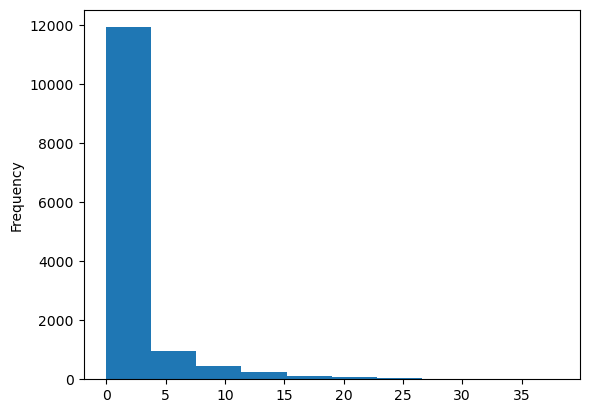

In [30]:
snow.plot.hist()

Since the data shown above is heavily skewed, we drop zero number

<Axes: title={'center': 'Snowfall Histogram (in)'}, ylabel='Frequency'>

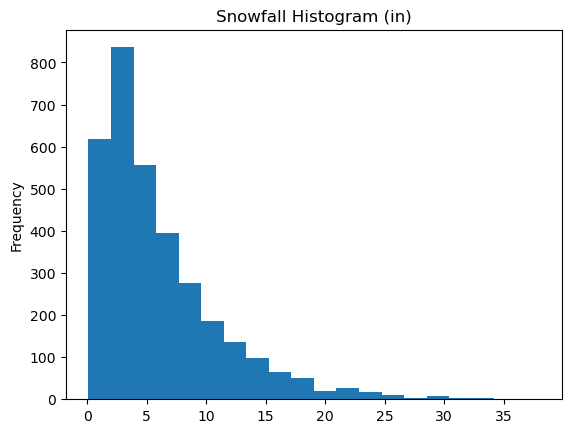

In [37]:
snow[snow>0].plot.hist(bins=20, title='Snowfall Histogram (in)')

Plot snow using line graph

<Axes: >

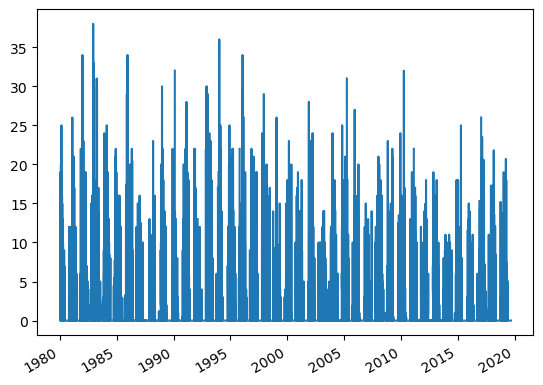

In [38]:
snow.plot.line()

Bar plot in Year 2017

In [45]:
season2017 = (snow.loc['2016-10':'2017-05'])

Calculate the average snow in season 2017

In [55]:
season2017.resample('M').sum().div(season2017.sum()).mul(100).rename(lambda idx: idx.month_name())

October      2.153969
November     9.772637
December    15.715995
January     25.468688
February    21.041085
March        9.274033
April       14.738732
May          1.834862
Name: SNOW, dtype: float64

Create Bar Plot

<Axes: title={'center': '2017 Monthly Percent of Snowfall'}>

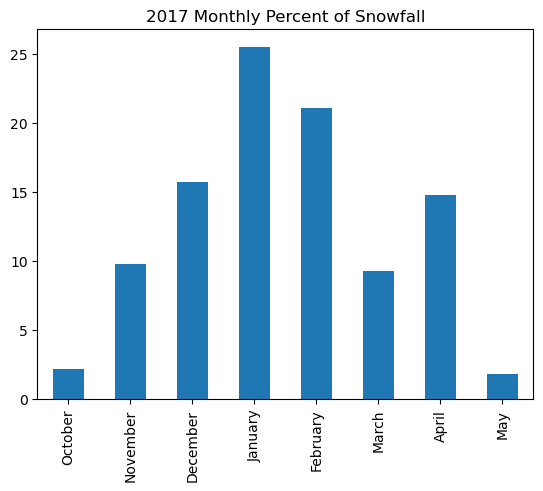

In [60]:
(season2017.resample('M').sum().div(season2017.sum()).mul(100)
 .rename(lambda idx: idx.month_name())
 .plot.bar(title='2017 Monthly Percent of Snowfall'))

Create Pie Plot

<Axes: title={'center': '2017 Monthly Percent of Snowfall'}, ylabel='SNOW'>

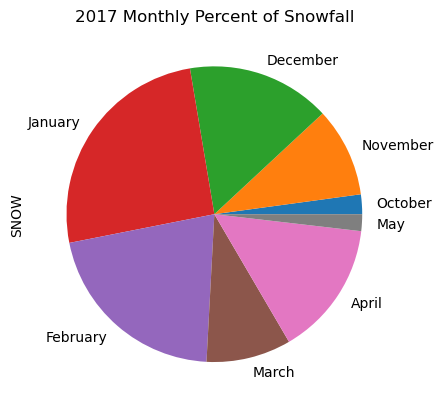

In [62]:
(season2017.resample('M').sum().div(season2017.sum()).mul(100)
 .rename(lambda idx: idx.month_name())
 .plot.pie(title='2017 Monthly Percent of Snowfall'))